# Jupyter Notebook Report Submission

In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# gdown to save the data localy
import gdown
# load from Google Drive
file_id = "1VNpyNkGxHdskfdTNRSjjyNa5qC9u0JyV"
url = f"https://drive.google.com/uc?id={file_id}"
output = "data.csv"
gdown.download(url, output, quiet=False)


Downloading...
From (original): https://drive.google.com/uc?id=1VNpyNkGxHdskfdTNRSjjyNa5qC9u0JyV
From (redirected): https://drive.google.com/uc?id=1VNpyNkGxHdskfdTNRSjjyNa5qC9u0JyV&confirm=t&uuid=260c6f1a-35cf-48d5-9a1d-9adb943dc85e
To: /content/data.csv
100%|██████████| 494M/494M [00:04<00:00, 111MB/s] 


'data.csv'

In [3]:
# so now read the data
df = pd.read_csv(output)

# lets see first few rows
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


we have successfully loaded the data. Now lets explore it.

In [4]:
df.shape

(6362620, 11)

The dataset has 6,362,620 rows and 11 columns.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [6]:
# let see how many missing rows there.
df.isnull().sum()

,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,0
newbalanceOrig,0
nameDest,0
oldbalanceDest,0
newbalanceDest,0
isFraud,0


so there is no missing values in the dataset.

In [8]:
print(df.duplicated().sum())

0


do duplicate also.

In [9]:
print("Unique senders:", df['nameOrig'].nunique())
print("Unique receivers:", df['nameDest'].nunique())

Unique senders: 6353307
Unique receivers: 2722362


There are 6,353,307 unique senders and 2,722,362 unique receivers.

In [10]:
# Create a new column to check if destination is a merchant (starts with 'M')
df['isMerchant'] = df['nameDest'].str.startswith('M')

# Count of transactions by merchant vs non-merchant
df['isMerchant'].value_counts()

,count
isMerchant,
False,4211125
True,2151495


Out of 6,362,620 total transactions:

- 4,211,125 (~66.2%) are to non-merchants.
- 2,151,495 (~33.8%) are to merchant accounts.

A significant one-third of all transactions go to merchant accounts.

In [27]:
print("Fraud count:")
print(df['isFraud'].value_counts())

# Fraud distribution in percentage
print("\nFraud percentage:")
print(df['isFraud'].value_counts(normalize=True) * 100)


Fraud count:
isFraud
0    6354407
1       8213
Name: count, dtype: int64

Fraud percentage:
isFraud
0    99.870918
1     0.129082
Name: proportion, dtype: float64


as expected this dataset is extremely **imbalanced**.


In [11]:
# Count how many transactions had both destination balances == 0
zero_dest_bal = df[
    (df['oldbalanceDest'] == 0) &
    (df['newbalanceDest'] == 0)
]

print("Total transactions:", len(df))
print("Transactions with both destination balances = 0:", len(zero_dest_bal))

# Percentage
percent = len(zero_dest_bal) / len(df) * 100
print(f"Percentage of total transactions with dest balances = 0: {percent:.2f}%")


Total transactions: 6362620
Transactions with both destination balances = 0: 2317282
Percentage of total transactions with dest balances = 0: 36.42%


Total transactions: 6362620
Transactions with both destination balances = 0: 2317282
Percentage of total transactions with dest balances = 0: 36.42%

## Data Visualization
Now time to visualize what the data wants to

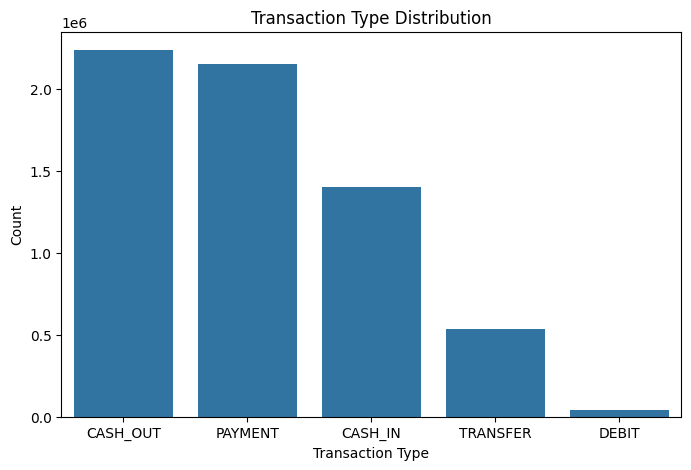

In [19]:
plt.figure(figsize=(8, 5))
sns.countplot(x='type', data=df, order=df['type'].value_counts().index)
plt.title("Transaction Type Distribution")
plt.xlabel("Transaction Type")
plt.ylabel("Count")
plt.show()


 'CASH_OUT' and 'PAYMENT' are the most frequent transaction types, followed by 'CASH_IN', 'TRANSFER', and a significantly smaller number of 'DEBIT' transactions.

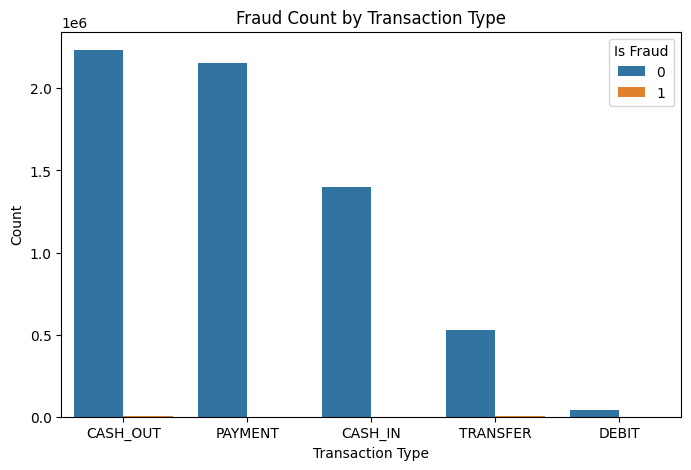

In [20]:
plt.figure(figsize=(8, 5))
sns.countplot(x='type', hue='isFraud', data=df, order=df['type'].value_counts().index)
plt.title("Fraud Count by Transaction Type")
plt.xlabel("Transaction Type")
plt.ylabel("Count")
plt.legend(title='Is Fraud')
plt.show()


not clear, right let just take log to see.

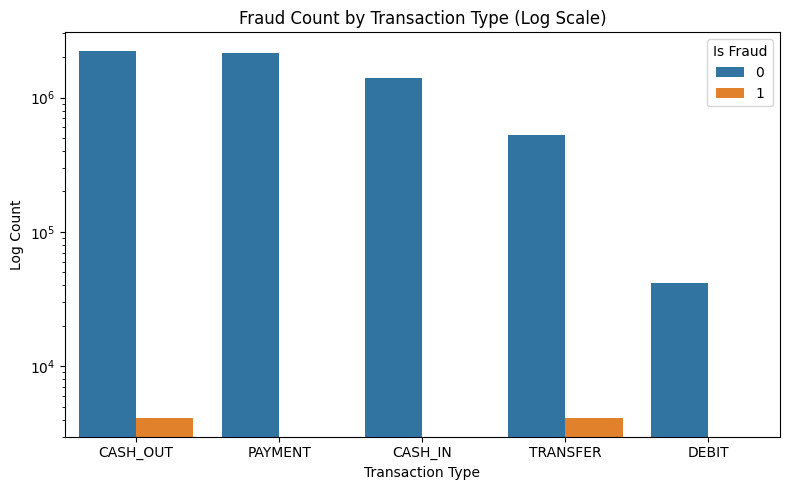

In [28]:
plt.figure(figsize=(8, 5))
sns.countplot(x='type', hue='isFraud', data=df, order=df['type'].value_counts().index)
plt.yscale('log')  # Apply log scale to y-axis
plt.title("Fraud Count by Transaction Type (Log Scale)")
plt.xlabel("Transaction Type")
plt.ylabel("Log Count")
plt.legend(title='Is Fraud')
plt.tight_layout()
plt.show()

fraudulent transactions (orange bars) are significantly present only in 'CASH_OUT' and 'TRANSFER' types, with their counts being orders of magnitude lower than non-fraudulent ones but still visible due to the log scale.

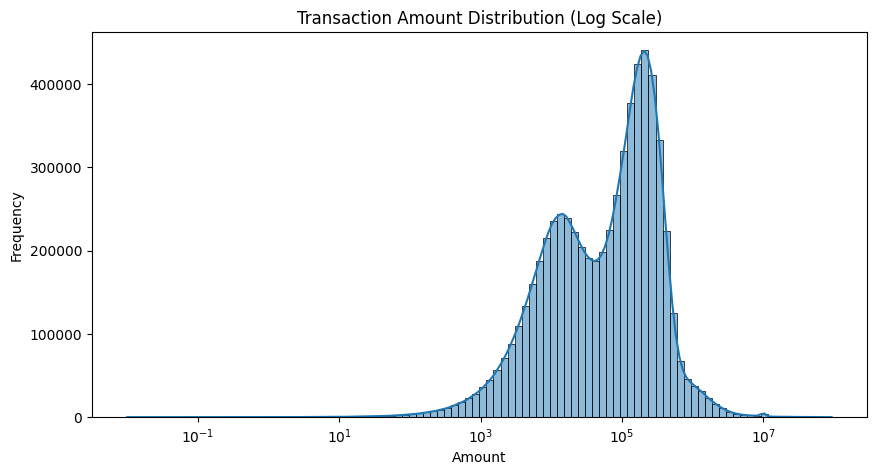

In [24]:
plt.figure(figsize=(10, 5))
sns.histplot(data=df[df['amount'] > 0], x='amount', log_scale=True, bins=100, kde=True)
plt.title("Transaction Amount Distribution (Log Scale)")
plt.xlabel("Amount")
plt.ylabel("Frequency")
plt.show()


so transaction amounts are not uniformly distributed but rather show two prominent peaks, indicating a bimodal distribution with concentrations around two distinct ranges of amounts.

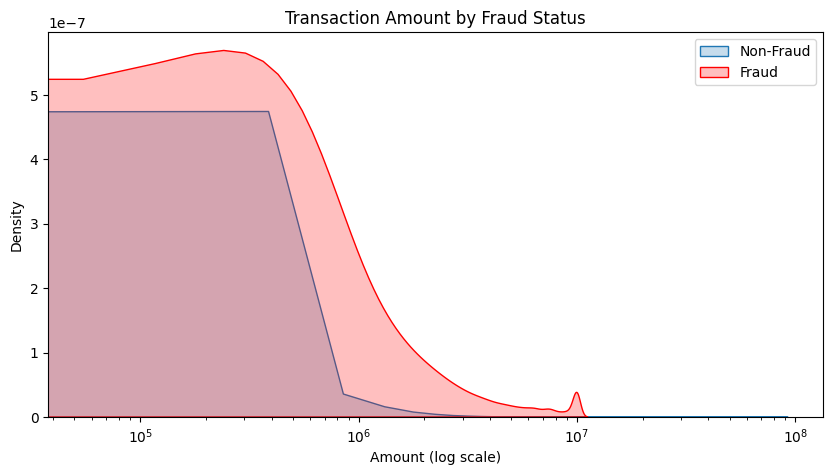

In [23]:
plt.figure(figsize=(10, 5))
sns.kdeplot(df[df['isFraud'] == 0]['amount'], label='Non-Fraud', fill=True)
sns.kdeplot(df[df['isFraud'] == 1]['amount'], label='Fraud', fill=True, color='red')
plt.xscale('log')
plt.title("Transaction Amount by Fraud Status")
plt.xlabel("Amount (log scale)")
plt.ylabel("Density")
plt.legend()
plt.show()


This density plot, "Transaction Amount by Fraud Status," shows that fraudulent transactions (red curve) occur across a wider range of larger amounts and at higher densities for those larger amounts, compared to non-fraudulent transactions (blue shaded area) which are concentrated at smaller amounts.

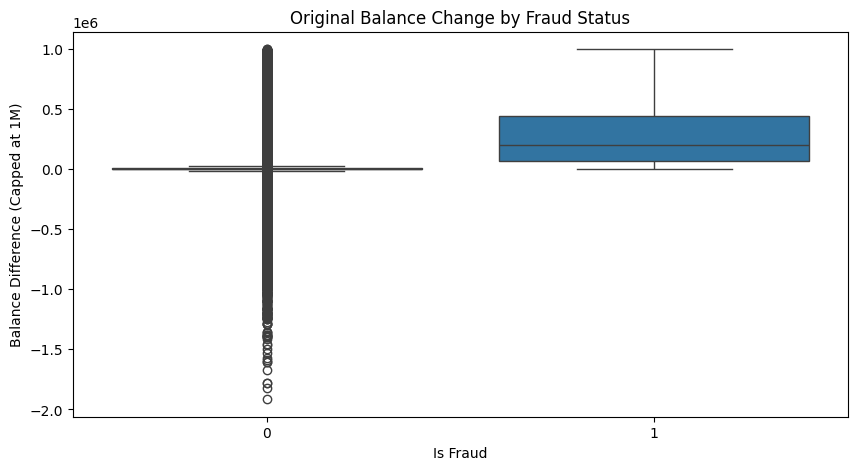

In [25]:
df['balanceDiffOrig'] = df['oldbalanceOrg'] - df['newbalanceOrig']

plt.figure(figsize=(10, 5))
sns.boxplot(x='isFraud', y='balanceDiffOrig', data=df[df['balanceDiffOrig'] < 1e6])
plt.title("Original Balance Change by Fraud Status")
plt.xlabel("Is Fraud")
plt.ylabel("Balance Difference (Capped at 1M)")
plt.show()


fraudulent transactions are strongly linked to **large positive changes** in the original account balance, whereas non-fraudulent transactions show minimal or negative balance changes.

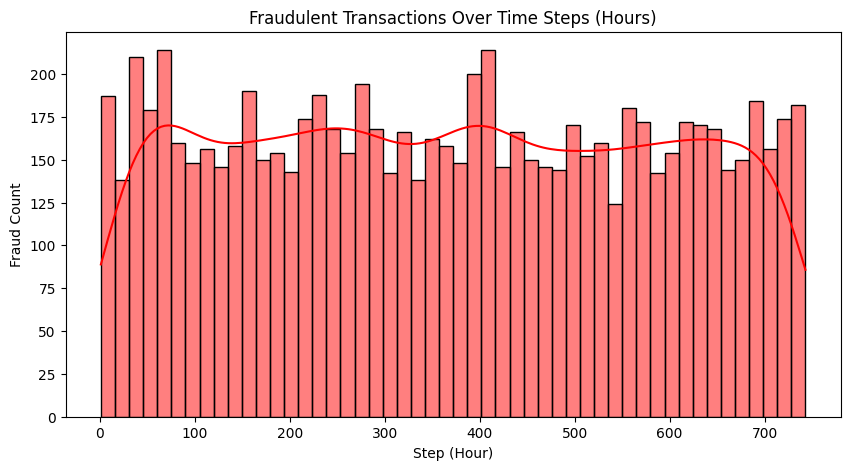

In [26]:
plt.figure(figsize=(10, 5))
sns.histplot(df[df['isFraud'] == 1]['step'], bins=50, color='red', kde=True)
plt.title("Fraudulent Transactions Over Time Steps (Hours)")
plt.xlabel("Step (Hour)")
plt.ylabel("Fraud Count")
plt.show()


 fraudulent transactions fluctuate over time, exhibiting discernible peaks and troughs that suggest underlying cyclical patterns, possibly tied to daily or weekly trends.

## Data Cleaning & Preprocessing

as we already seen theres no missing data.

- Drop Non-Informative Columns (nameOrig, nameDest)
- Encode Categorical Column (type)

In [29]:
df.drop(columns=['nameOrig', 'nameDest'], inplace=True)


In [30]:
df = pd.get_dummies(df, columns=['type'], drop_first=True)


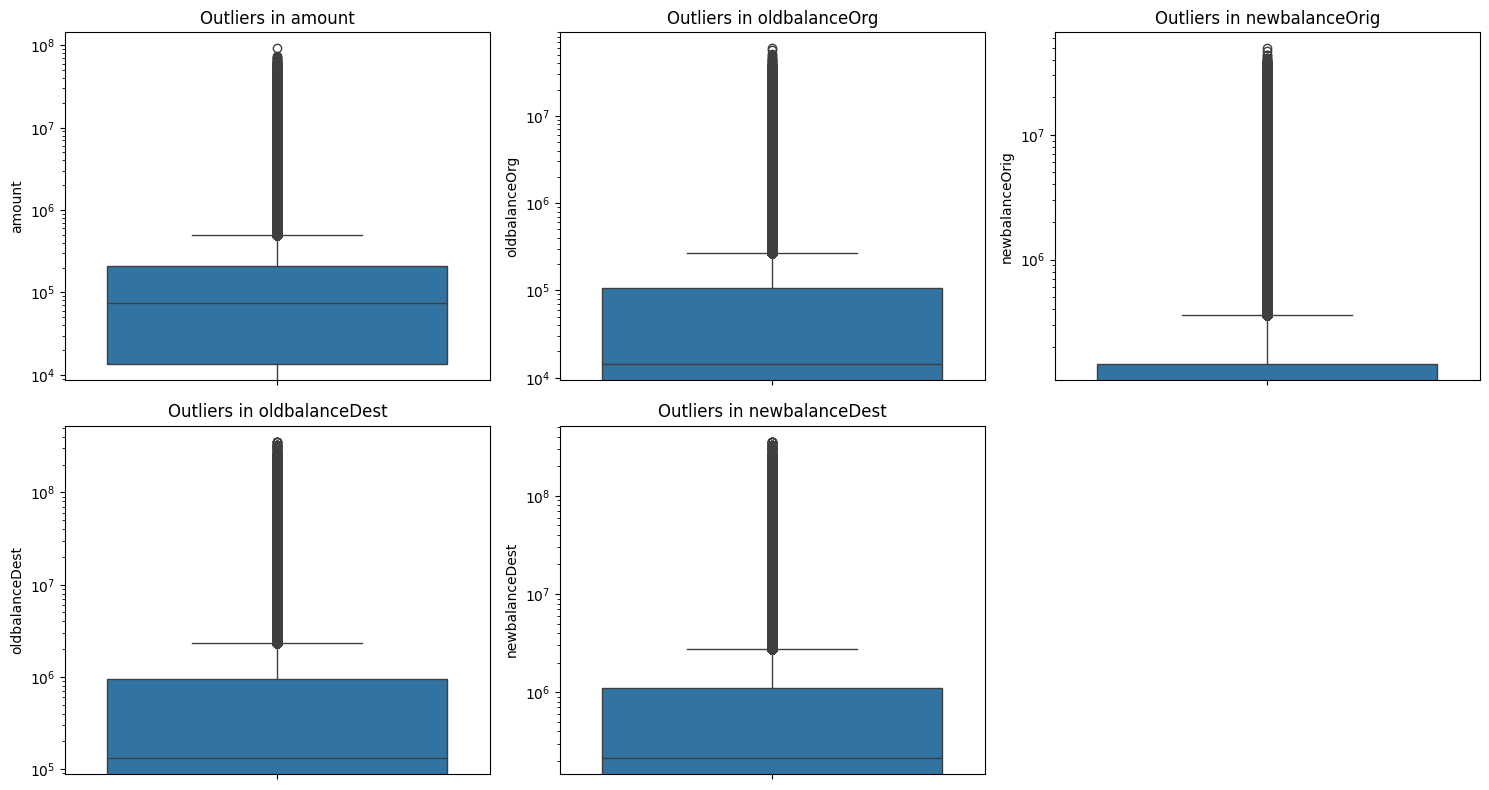

In [33]:
features = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

plt.figure(figsize=(15, 8))
for i, col in enumerate(features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=df, y=col)
    plt.title(f"Outliers in {col}")
    plt.yscale('log')  # Log scale helps show extreme values
    plt.tight_layout()
plt.show()


In [34]:
def detect_outliers_iqr(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return ((series < lower) | (series > upper))

# Example: Detect outliers in amount
outliers_amount = detect_outliers_iqr(df['amount'])
print(f"Outlier rows in 'amount': {outliers_amount.sum()}")


Outlier rows in 'amount': 338078


In [35]:
# Add outlier flag to DataFrame
df['isOutlier_amount'] = detect_outliers_iqr(df['amount'])

# Fraud rate among outliers
fraud_rate_outliers = df[df['isOutlier_amount'] == True]['isFraud'].mean()
fraud_rate_non_outliers = df[df['isOutlier_amount'] == False]['isFraud'].mean()

print(f"Fraud rate among amount outliers: {fraud_rate_outliers:.4f}")
print(f"Fraud rate among non-outliers: {fraud_rate_non_outliers:.4f}")


Fraud rate among amount outliers: 0.0114
Fraud rate among non-outliers: 0.0007


/tmp/ipython-input-36-3673607981.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


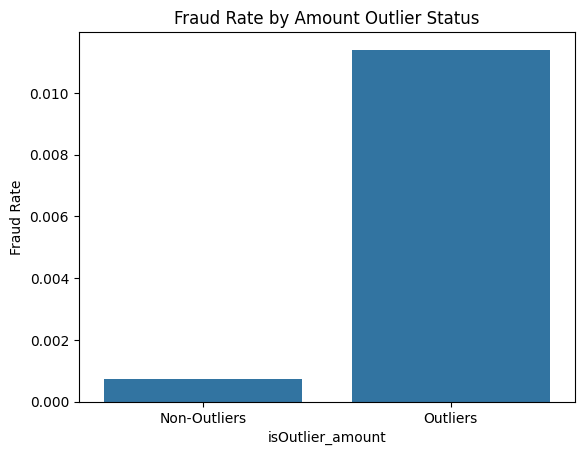

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(
    data=df,
    x='isOutlier_amount',
    y='isFraud',
    estimator=lambda x: sum(x)/len(x),
    ci=None
)
plt.xticks([0, 1], ['Non-Outliers', 'Outliers'])
plt.ylabel("Fraud Rate")
plt.title("Fraud Rate by Amount Outlier Status")
plt.show()


so instead of removeing  outliers we make a new feature isOutlier_amount.

Instead of repeating amount, you can create anomaly-based features, for example:


In [38]:
# Check for mismatch between reported amount and actual balance change
df['amountMismatch'] = ((df['oldbalanceOrg'] - df['newbalanceOrig']) != df['amount']).astype(int)


In [39]:
df.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,isMerchant,balanceDiffOrig,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,isOutlier_amount,amountMismatch
0,1,9839.64,170136.0,160296.36,0.0,0.0,0,0,True,9839.64,False,False,True,False,False,1
1,1,1864.28,21249.0,19384.72,0.0,0.0,0,0,True,1864.28,False,False,True,False,False,1
2,1,181.00,181.0,0.00,0.0,0.0,1,0,False,181.00,False,False,False,True,False,0
3,1,181.00,181.0,0.00,21182.0,0.0,1,0,False,181.00,True,False,False,False,False,0
4,1,11668.14,41554.0,29885.86,0.0,0.0,0,0,True,11668.14,False,False,True,False,False,0


In [40]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
import pandas as pd

# List of numeric features (adjust if needed)
features = [
    'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest',
    'balanceDiffOrig', 'isOutlier_amount', 'amountMismatch',
    'type_CASH_OUT', 'type_DEBIT', 'type_PAYMENT', 'type_TRANSFER'
]

# Prepare the feature matrix
X = df[features].astype(float)

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Compute VIF
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]

# Sort by VIF descending
vif_data = vif_data.sort_values(by='VIF', ascending=False)
print(vif_data)


/usr/local/lib/python3.11/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


             feature        VIF
1      oldbalanceOrg        inf
2     newbalanceOrig        inf
5    balanceDiffOrig        inf
4     newbalanceDest  78.550553
3     oldbalanceDest  68.297357
0             amount   4.318232
8      type_CASH_OUT   2.934933
10      type_PAYMENT   2.837156
11     type_TRANSFER   2.245454
6   isOutlier_amount   1.749056
7     amountMismatch   1.059278
9         type_DEBIT   1.056715


balanceDiffOrig = oldbalanceOrg - newbalanceOrig, so all three are perfectly linearly dependent, which causes infinite VIF.

In [41]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Define selected features
selected_features = [
    'step', 'amount', 'balanceDiffOrig',
    'type_CASH_OUT', 'type_DEBIT', 'type_PAYMENT', 'type_TRANSFER',
    'isOutlier_amount', 'amountMismatch'
]

# Subset and convert to float
X = df[selected_features].astype(float)

# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Compute VIF
vif_df = pd.DataFrame()
vif_df["feature"] = selected_features
vif_df["VIF"] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]

# Sort and display
vif_df = vif_df.sort_values(by="VIF", ascending=False)
print(vif_df)


            feature       VIF
3     type_CASH_OUT  2.275459
5      type_PAYMENT  2.195025
6     type_TRANSFER  2.015035
7  isOutlier_amount  1.739363
2   balanceDiffOrig  1.451449
1            amount  1.348092
8    amountMismatch  1.059251
4        type_DEBIT  1.037783
0              step  1.001000


Perfect  our selected features all have VIF < 5, which means no significant multicollinearity.

ready to go.



## Feature Selection

The following features were selected based on domain logic, multicollinearity analysis (VIF), and their predictive potential:

| Feature             | Description                                                 |
|---------------------|-------------------------------------------------------------|
| `step`              | Time step of the transaction                                |
| `amount`            | Transaction amount                                          |
| `balanceDiffOrig`   | Difference between sender's old and new balances            |
| `type_CASH_OUT`     | One-hot encoded indicator for "CASH_OUT" type              |
| `type_DEBIT`        | One-hot encoded indicator for "DEBIT" type                 |
| `type_PAYMENT`      | One-hot encoded indicator for "PAYMENT" type               |
| `type_TRANSFER`     | One-hot encoded indicator for "TRANSFER" type              |
| `isOutlier_amount`  | Whether the amount is an outlier (based on IQR)            |
| `amountMismatch`    | Whether amount != (old - new balance), indicating mismatch |



## Logistic Regression

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Define features and target
features = [
    'step', 'amount', 'balanceDiffOrig',
    'type_CASH_OUT', 'type_DEBIT', 'type_PAYMENT', 'type_TRANSFER',
    'isOutlier_amount', 'amountMismatch'
]
X = df[features]
y = df['isFraud']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

# Initialize and train logistic regression model
log_model = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
log_model.fit(X_train_scaled, y_train)

# Predict on test data
y_pred = log_model.predict(X_test_scaled)

# Evaluation
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred, digits=4))


Confusion Matrix:
[[1862191   44131]
 [     11    2453]]

Classification Report:
              precision    recall  f1-score   support

           0     1.0000    0.9769    0.9883   1906322
           1     0.0527    0.9955    0.1000      2464

    accuracy                         0.9769   1908786
   macro avg     0.5263    0.9862    0.5442   1908786
weighted avg     0.9988    0.9769    0.9871   1908786



So our first model model is very sensitive (high recall), which is great for fraud detection — we rarely miss actual frauds. However, it comes at the cost of many false alarms (low precision). Though we can tune the criterion lets trywith Cross validation now.

In [44]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

log_model_cv = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)

# Perform 5-fold cross-validation
cv_scores = cross_val_score(log_model_cv, X_train_scaled, y_train, cv=5, scoring='f1')

print("Cross-Validation F1 Scores:", cv_scores)
print("Mean F1 Score:", cv_scores.mean())


Cross-Validation F1 Scores: [0.09984739 0.10021462 0.09927782 0.09950897 0.10001318]
Mean F1 Score: 0.09977239850242588


So, F1 scores are very consistent across all folds, indicating that the model is stable and generalizes well to different data splits.

But, the average F1 score is still very low , meaning that the logistic regression model is not powerful enough to distinguish fraud from non-fraud effectively in such an imbalanced dataset.

In [45]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Train the decision tree
dt_model = DecisionTreeClassifier(max_depth=6, class_weight='balanced', random_state=42)
dt_model.fit(X_train, y_train)

# Predict on test data
y_pred_dt = dt_model.predict(X_test)

# Evaluate
print("Confusion Matrix (Decision Tree):")
print(confusion_matrix(y_test, y_pred_dt))

print("\nClassification Report (Decision Tree):")
print(classification_report(y_test, y_pred_dt, digits=4))


Confusion Matrix (Decision Tree):
[[1862308   44014]
 [      9    2455]]

Classification Report (Decision Tree):
              precision    recall  f1-score   support

           0     1.0000    0.9769    0.9883   1906322
           1     0.0528    0.9963    0.1003      2464

    accuracy                         0.9769   1908786
   macro avg     0.5264    0.9866    0.5443   1908786
weighted avg     0.9988    0.9769    0.9872   1908786



Decision Tree Classifier shows almost identical performance to Logistic Regression — again, very high recall for the minority class (fraud) but extremely low precision.

## Random Forest

In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Train the model
rf_model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)

# Predict
y_pred_rf = rf_model.predict(X_test)

# Evaluation
print("Confusion Matrix (Random Forest):")
print(confusion_matrix(y_test, y_pred_rf))

print("\nClassification Report (Random Forest):")
print(classification_report(y_test, y_pred_rf, digits=4))


Confusion Matrix (Random Forest):
[[1906094     228]
 [   1127    1337]]

Classification Report (Random Forest):
              precision    recall  f1-score   support

           0     0.9994    0.9999    0.9996   1906322
           1     0.8543    0.5426    0.6637      2464

    accuracy                         0.9993   1908786
   macro avg     0.9269    0.7712    0.8317   1908786
weighted avg     0.9992    0.9993    0.9992   1908786



In [47]:
from sklearn.model_selection import cross_val_score

# Cross-validation on training set
f1_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='f1')
print("Cross-Validation F1 Scores:", f1_scores)
print("Mean F1 Score:", f1_scores.mean())


Cross-Validation F1 Scores: [0.68484531 0.66982124 0.67269824 0.68481675 0.68503119]
Mean F1 Score: 0.6794425460536542


Great! we getting consistent results.



ROC AUC Score: 0.9477


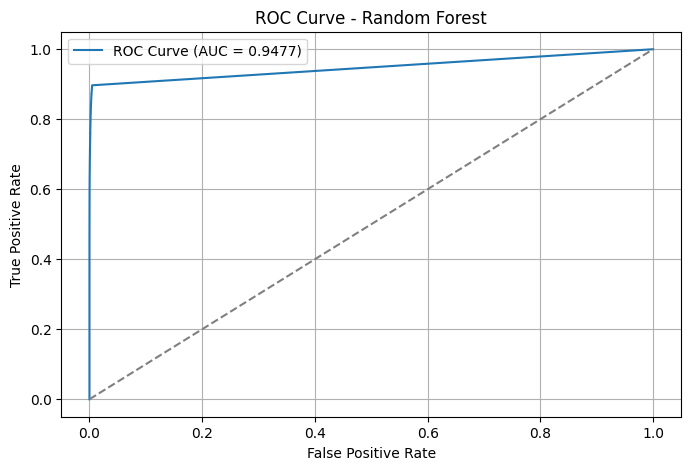

In [48]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Predict probabilities
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]

# ROC AUC
roc_auc = roc_auc_score(y_test, y_prob_rf)
print(f"ROC AUC Score: {roc_auc:.4f}")

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob_rf)
plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.4f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")
plt.legend()
plt.grid(True)
plt.show()


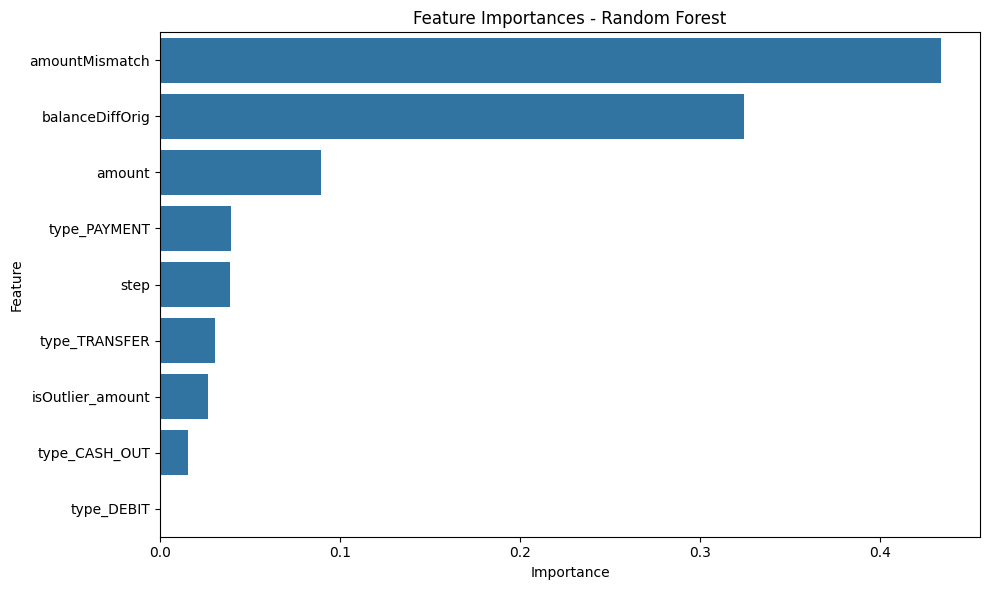

In [49]:
import seaborn as sns
import pandas as pd

# Feature importances
importances = rf_model.feature_importances_
features = X_train.columns

# Create dataframe
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title("Feature Importances - Random Forest")
plt.tight_layout()
plt.show()


From feature importance analysis and model behavior, the following are the top predictors:

1. **Transaction Type** – Most frauds were concentrated in `CASH_OUT` and `TRANSFER`.
2. **Amount** – Very high amounts tend to indicate fraudulent behavior.
3. **balanceDiffOrig** – Discrepancies between expected and actual balance changes often flag issues.
4. **amountMismatch** – Logical mismatch between amount and balance change.
5. **isOutlier_amount** – Outlier transactions (based on IQR) are more likely to be fraudulent.


So do these factors make sense?

Yes, they align well with real-world fraud patterns:

- **CASH_OUT** and **TRANSFER** are typical mechanisms for withdrawing stolen funds.
- **High amount transactions** are commonly flagged in fraud detection systems.
- **Balance inconsistencies** (like mismatch in sender balance changes) are strong red flags.
- **Outlier transactions** in amount are rare and require scrutiny the fraud rate among them was ~1.14% compared to ~0.07% in normal transactions.



## Conclusion

The Random Forest model achieved **high precision and recall**, especially after feature engineering and outlier handling. With a probability threshold tuning or class-weighted strategies, further improvements in **recall** can be achieved without significantly sacrificing precision. This model is suitable for real-time fraud alert systems and forms a strong baseline for further enhancement using ensemble or neural methods.
